In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
titanic = pd.read_csv(r"C:\Users\adars\Downloads\titanic_dataset .csv")

In [4]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### Filling Null Values

In [6]:
titanic.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

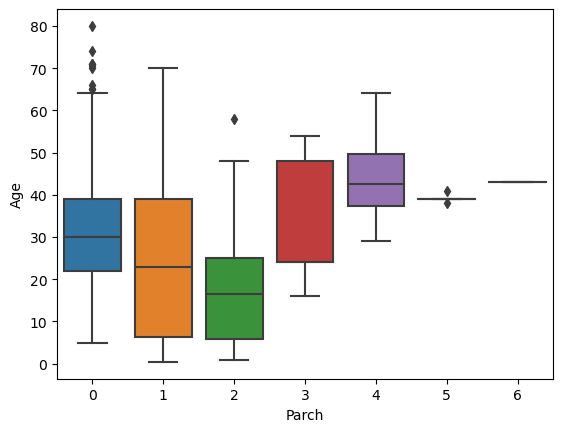

In [7]:
sns.boxplot(x = 'Parch', y = 'Age', data = titanic)
plt.show()

In [8]:
titanic_grouped = titanic.groupby('Parch')

In [9]:
titanic_grouped.median()

,PassengerId,Survived,Pclass,Age,SibSp,Fare
Parch,,,,,,
0,452.5,0.0,3.0,30.0,0.0,10.50000
1,448.0,1.0,2.0,23.0,1.0,26.00000
2,406.5,0.5,3.0,16.5,1.0,32.88125
3,737.0,1.0,3.0,24.0,1.0,23.00000
4,400.0,0.0,3.0,42.5,1.0,27.90000
5,611.0,0.0,3.0,39.0,1.0,31.27500
6,679.0,0.0,3.0,43.0,1.0,46.90000


In [10]:
titanic = titanic.drop('Cabin', axis = 1)

In [11]:
def remove_nulls(cols):
    Age = cols[0]
    Parch = cols[1]
    
    if pd.isnull(Age):
        if Parch == 0:
            return 30
        elif Parch == 1:
            return 23
        elif Parch == 2:
            return 16.5
        elif Parch == 3:
            return 24
        elif Parch == 4:
            return 42.5
        elif Parch == 5:
            return 39
        elif Parch == 6:
            return 43
        
    else:
        return Age
    

In [12]:
titanic['Age'] = titanic[['Age', 'Parch']].apply(lambda x: remove_nulls(x), axis = 1)

In [13]:
titanic.dropna(inplace = True)

In [15]:
titanic.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

### Encoding the categorical values

In [16]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   Age          889 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 83.3+ KB


In [17]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
sex_encoded = le.fit_transform(titanic['Sex'])
sex_encoded = pd.DataFrame({'Sex' : sex_encoded})

titanic.drop('Sex', axis = 1)
titanic = pd.concat([titanic, sex_encoded], axis = 1)

In [18]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Sex
0,1.0,0.0,3.0,"Braund, Mr. Owen Harris",male,22.0,1.0,0.0,A/5 21171,7.2500,S,1.0
1,2.0,1.0,1.0,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1.0,0.0,PC 17599,71.2833,C,0.0
2,3.0,1.0,3.0,"Heikkinen, Miss. Laina",female,26.0,0.0,0.0,STON/O2. 3101282,7.9250,S,0.0
3,4.0,1.0,1.0,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1.0,0.0,113803,53.1000,S,0.0
4,5.0,0.0,3.0,"Allen, Mr. William Henry",male,35.0,0.0,0.0,373450,8.0500,S,1.0


In [19]:
titanic.nunique()

PassengerId    889
Survived         2
Pclass           3
Name           889
Sex              2
Age             89
SibSp            7
Parch            7
Ticket         680
Fare           247
Embarked         3
Sex              2
dtype: int64

In [20]:
le = LabelEncoder()
embarked_encoded = le.fit_transform(titanic['Embarked'])

In [21]:
embarked_encoded[0:100]

array([2, 0, 2, 2, 2, 1, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 1, 2, 2, 0, 2, 2,
       1, 2, 2, 2, 0, 2, 1, 2, 0, 0, 1, 2, 0, 2, 0, 2, 2, 0, 2, 2, 0, 0,
       1, 2, 1, 1, 0, 2, 2, 2, 0, 2, 0, 2, 2, 0, 2, 2, 0, 2, 2, 0, 0, 2,
       2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 2, 2])

In [23]:
from sklearn.preprocessing import OneHotEncoder
one_hot = OneHotEncoder()
embarked_1hot_encoded = one_hot.fit_transform(embarked_encoded.reshape(-1, 1))
embarked_matrix = embarked_1hot_encoded.toarray()
embarked_df = pd.DataFrame(embarked_matrix, columns=['C', 'Q', 'S', 'NAn'])

In [24]:
titanic = pd.concat([titanic, embarked_df], axis = 1)

In [29]:
titanic = titanic.drop('NAn', axis = 1)

In [31]:
titanic.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked', 'Sex', 'C', 'Q', 'S'],
      dtype='object')

## Modelling

In [44]:
x = titanic.drop(['PassengerId', 'Survived', 'Name', 'Embarked', 'Ticket'], axis=1)
y = titanic['Survived']


In [74]:
x.columns

Index(['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'C', 'Q', 'S'], dtype='object')

In [73]:
from sklearn.preprocessing import MinMaxScaler
min = MinMaxScaler()
min = min.fit_transform(x)


In [75]:
x= pd.DataFrame(x, columns = ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'C', 'Q', 'S'])

In [59]:
x = x.drop('Sex', axis = 1)

In [62]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, random_state= 42, test_size= .25)

#### With kNN 

In [51]:
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


In [54]:
from sklearn.neighbors import KNeighborsClassifier

In [76]:
knn = KNeighborsClassifier()
paramgrid_knn = {'n_neighbors' : [5,6,7,8,9],
                'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute'],
                'p' : [1,2]}

In [77]:
gridsearch_knn = GridSearchCV(estimator= knn, param_grid= paramgrid_knn, cv= 5)
gridsearch_knn.fit(x_train,y_train)

C:\Users\adars\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\adars\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': [5, 6, 7, 8, 9], 'p': [1, 2]})

In [78]:
gridsearch_knn.best_params_

{'algorithm': 'brute', 'n_neighbors': 5, 'p': 1}

In [79]:
best_model_knn = gridsearch_knn.best_estimator_

In [80]:
prediction = best_model_knn.predict(x_test)

C:\Users\adars\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [65]:
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score

In [81]:
print('Accuracy_score: ', accuracy_score(y_test, prediction))
print('Recall_Score ', recall_score(y_test, prediction))
print(confusion_matrix(y_test, prediction))

Accuracy_score:  0.6531531531531531
Recall_Score  0.5054945054945055
[[99 32]
 [45 46]]


#### With SVM

In [82]:
from sklearn.svm import SVC

In [92]:
svc = SVC()
param_grid_svm = {'C' : [1,5,10],
                 'kernel' : ['linear', 'poly', 'rbf']}

In [93]:
grid_search_svc = GridSearchCV(estimator = svc, param_grid= param_grid_svm, cv = 3)
grid_search_svc.fit(x_train, y_train)

GridSearchCV(cv=3, estimator=SVC(),
             param_grid={'C': [1, 5, 10], 'kernel': ['linear', 'poly', 'rbf']})

In [96]:
grid_search_svc.best_params_

{'C': 5, 'kernel': 'linear'}

In [94]:
best_model_svc = grid_search_svc.best_estimator_.predict(x_test)

In [95]:
print('Accuracy_score: ', accuracy_score(y_test, best_model_svc))
print('Recall_Score ', recall_score(y_test, best_model_svc))
print(confusion_matrix(y_test, best_model_svc))

Accuracy_score:  0.6621621621621622
Recall_Score  0.43956043956043955
[[107  24]
 [ 51  40]]


### Kfold cv and Kfold Stratification cv

In [97]:
kfold = KFold(10)

In [98]:
from sklearn.model_selection import cross_val_score

In [99]:
cv_score = cross_val_score(svc,x,y,cv = kfold)
print(cv_score)

[0.57303371 0.68539326 0.6741573  0.68539326 0.64044944 0.70786517
 0.65168539 0.72727273 0.72727273 0.69318182]


In [100]:
np.mean(cv_score)

0.676570480081716

In [101]:
# now lets do k fold stratified cv

In [102]:
from sklearn.model_selection import StratifiedKFold

In [104]:
strat_k = StratifiedKFold(n_splits= 10)
skcv_score = cross_val_score(svc,x,y,cv = strat_k)

In [107]:
print(skcv_score)

[0.59550562 0.57303371 0.68539326 0.74157303 0.68539326 0.69662921
 0.68539326 0.72727273 0.69318182 0.67045455]


In [108]:
np.mean(skcv_score)

0.6753830439223698